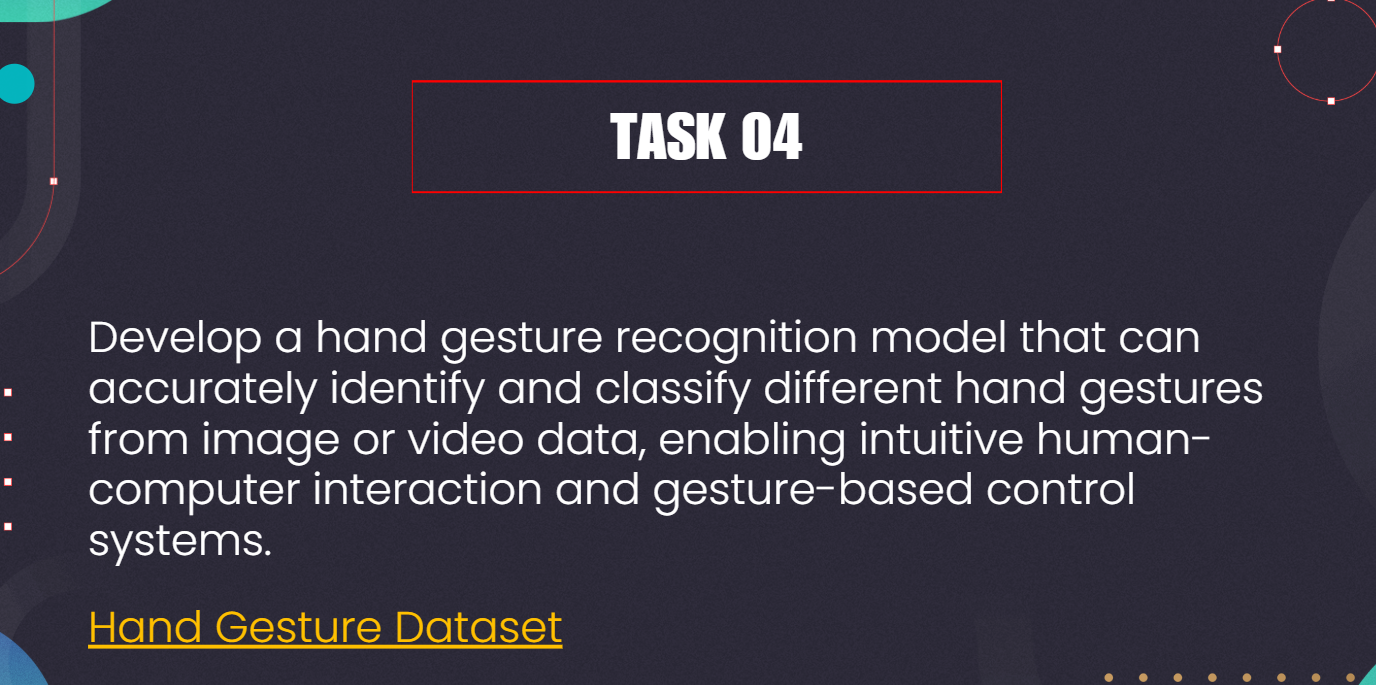

# Libraries Required

In [52]:
# for data manipulation
import pandas as pd
import numpy as np

# for directory
import os
import shutil
import random

# for visualization purposes
import matplotlib.image as mpimg
import matplotlib.pyplot as plt



# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import image_dataset_from_directory

####
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Loading Dataset from Kaggle

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gti-upm/leapgestrecog")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/leapgestrecog


In [10]:
# let's see what's is in the directory
os.listdir(path)

['leapGestRecog', 'leapgestrecog']

In [11]:
# let's see what is inside leapGestRecog and leapgestrecog
print("inside : - leapGestRecog")
print(os.listdir(path + '/leapGestRecog'))

print("\ninside : - leapgestrecog")
print(os.listdir(path + '/leapgestrecog'))

inside : - leapGestRecog
['07', '05', '06', '02', '04', '00', '08', '09', '03', '01']

inside : - leapgestrecog
['leapGestRecog']


In [12]:
# Let's see what is inside the subdirectories of leapGestRecog
leapGestRecog = path + '/leapGestRecog'
print(os.listdir(leapGestRecog + '/01'))

['02_l', '04_fist_moved', '09_c', '10_down', '06_index', '08_palm_moved', '07_ok', '05_thumb', '01_palm', '03_fist']


# Let's see how these and gestures looks like

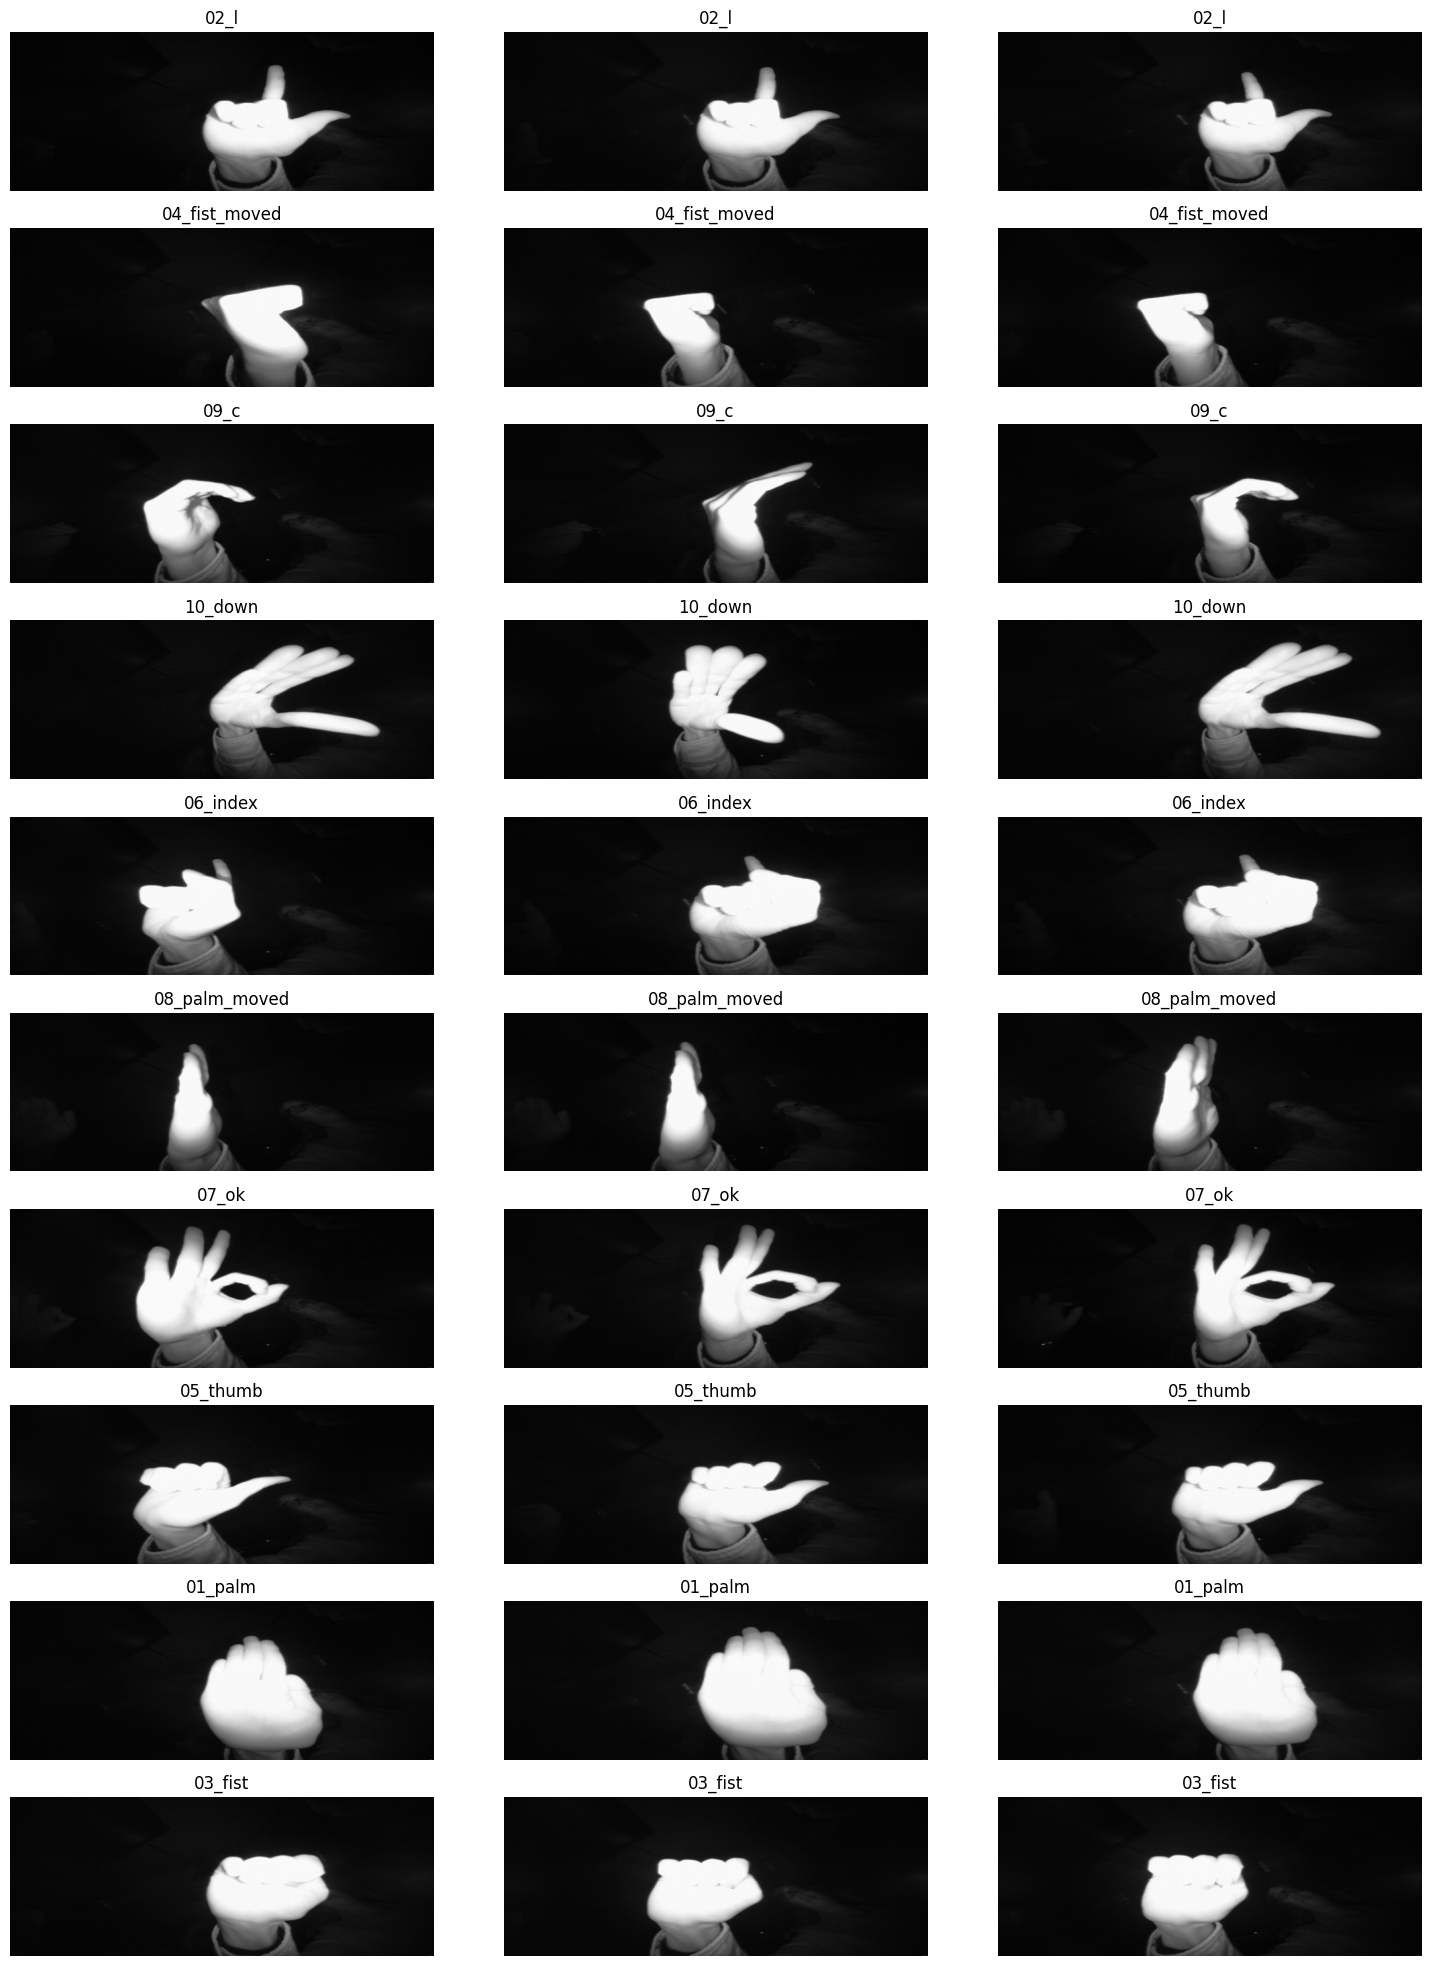

In [14]:
# let's choose a random directory
random_dir = os.listdir(leapGestRecog + '/00')
# creating a counter for plot positioning
counter = 0

# visualization of images in grayscale
plt.figure(figsize=(15,20))
for i in random_dir:
  for j in list(os.listdir(leapGestRecog + '/00' + '/' + str(i)))[:3]:
      counter +=1
      plt.subplot(10,3,counter)
      image_path = mpimg.imread(leapGestRecog + '/00' + '/' + str(i) + '/' + str(j))
      plt.title(f"{i}")
      plt.tight_layout()
      plt.imshow(image_path,cmap='grey')
      plt.axis('off')

In [15]:
#shutil.rmtree(train_dir)
#shutil.rmtree(test_dir)
#shutil.rmtree(training)
#shutil.rmtree(testing)

# Splitting directory into Train and test

In [16]:
# source directory
source_dir = path + '/leapGestRecog'

# creating new Directories for train and test
train_dir = "/kaggle/working/train"
test_dir = "/kaggle/working/test"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# subdirectories
subdirs = [d for d in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, d))]

# shuffling subdirectories
random.shuffle(subdirs)

train_subdirs = subdirs[:8]
test_subdirs = subdirs[8:]

# copying the subdirectories into train_dir and test_dir respectively
for dir in train_subdirs:
  shutil.copytree(os.path.join(source_dir, dir), os.path.join(train_dir, dir))

for dir in test_subdirs:
  shutil.copytree(os.path.join(source_dir, dir), os.path.join(test_dir, dir))

# print
print(f"Source_dir : {os.listdir(source_dir)}\n")
print(f"Train_dir : {os.listdir(train_dir)}\n")
print(f"Test_dir : {os.listdir(test_dir)}\n")

Source_dir : ['07', '05', '06', '02', '04', '00', '08', '09', '03', '01']

Train_dir : ['04', '07', '06', '00', '08', '02', '09', '01']

Test_dir : ['03', '05']



# Now creating directories as per classes for training and testing

***Training***

In [17]:
# creating a new training directory
training = "kaggle/working/train/training"
os.makedirs(training, exist_ok=True)

training_dir_list = list(os.listdir(train_dir + '/09'))

# making sub-directories under training directory as by classes names
for i in training_dir_list:
  i = "kaggle/working/train/training/" + str(i)
  os.makedirs(i, exist_ok = True)

print(f"Sub-directories of training directory are : - {os.listdir(training)}")

Sub-directories of training directory are : - ['06_index', '08_palm_moved', '02_l', '10_down', '04_fist_moved', '01_palm', '03_fist', '09_c', '05_thumb', '07_ok']


In [18]:
# for checking purpose
print("Before copying")
print(os.listdir(training + '/10_down'))

# copy all files according to sub directories of train_dir to training sub directories
for dir in os.listdir(train_dir):
  for sub_dir in os.listdir(train_dir + '/' + str(dir)):
    for file_name in os.listdir(train_dir + '/' + str(dir) + '/' + str(sub_dir)):
         full_file_name = os.path.join(train_dir + '/' + str(dir) + '/' + str(sub_dir), file_name)
         if os.path.isfile(full_file_name):
          shutil.copy(full_file_name, training + '/' + str(sub_dir))

print("\nAfter operation")
print(os.listdir(training + '/10_down'))

Before copying
[]

After operation
['frame_08_10_0066.png', 'frame_06_10_0132.png', 'frame_04_10_0029.png', 'frame_02_10_0027.png', 'frame_04_10_0120.png', 'frame_06_10_0147.png', 'frame_01_10_0090.png', 'frame_01_10_0035.png', 'frame_06_10_0024.png', 'frame_07_10_0153.png', 'frame_08_10_0089.png', 'frame_01_10_0089.png', 'frame_02_10_0103.png', 'frame_07_10_0064.png', 'frame_01_10_0142.png', 'frame_08_10_0003.png', 'frame_00_10_0046.png', 'frame_06_10_0108.png', 'frame_01_10_0136.png', 'frame_04_10_0100.png', 'frame_02_10_0041.png', 'frame_01_10_0030.png', 'frame_06_10_0076.png', 'frame_06_10_0062.png', 'frame_09_10_0020.png', 'frame_08_10_0038.png', 'frame_04_10_0002.png', 'frame_00_10_0194.png', 'frame_00_10_0022.png', 'frame_01_10_0079.png', 'frame_00_10_0183.png', 'frame_08_10_0185.png', 'frame_00_10_0130.png', 'frame_01_10_0012.png', 'frame_04_10_0085.png', 'frame_08_10_0019.png', 'frame_04_10_0027.png', 'frame_09_10_0046.png', 'frame_08_10_0197.png', 'frame_00_10_0036.png', 'fra

***Testing***

In [19]:
os.listdir(test_dir)

['03', '05']

In [20]:
# creating a directory as testing which contains all sub directory named as class labels
testing = "kaggle/working/test/testing"
os.makedirs(testing, exist_ok=True)

testing_dir_list = list(os.listdir(test_dir + '/03'))

for i in testing_dir_list:
  i = "kaggle/working/test/testing/" + str(i)
  os.makedirs(i, exist_ok = True)

print(f"Sub-directories of testing directory are : - {os.listdir(testing)}")

Sub-directories of testing directory are : - ['06_index', '08_palm_moved', '02_l', '10_down', '04_fist_moved', '01_palm', '03_fist', '09_c', '05_thumb', '07_ok']


In [21]:
# for checking purpose
print("Before copying")
print(os.listdir(testing + '/10_down'))

# copy all files according to sub directories of test_dir to testing sub directories
for dir in os.listdir(test_dir):
  for sub_dir in os.listdir(test_dir + '/' + str(dir)):
    for file_name in os.listdir(test_dir + '/' + str(dir) + '/' + str(sub_dir)):
         full_file_name = os.path.join(test_dir + '/' + str(dir) + '/' + str(sub_dir), file_name)
         if os.path.isfile(full_file_name):
          shutil.copy(full_file_name, testing + '/' + str(sub_dir))


print("\nAfter operation")
print(os.listdir(testing + '/10_down'))

Before copying
[]

After operation
['frame_03_10_0042.png', 'frame_05_10_0122.png', 'frame_05_10_0184.png', 'frame_05_10_0144.png', 'frame_05_10_0016.png', 'frame_05_10_0089.png', 'frame_05_10_0109.png', 'frame_05_10_0120.png', 'frame_03_10_0043.png', 'frame_05_10_0074.png', 'frame_03_10_0070.png', 'frame_03_10_0035.png', 'frame_05_10_0028.png', 'frame_05_10_0183.png', 'frame_03_10_0092.png', 'frame_05_10_0115.png', 'frame_03_10_0159.png', 'frame_03_10_0123.png', 'frame_05_10_0061.png', 'frame_03_10_0174.png', 'frame_03_10_0031.png', 'frame_03_10_0151.png', 'frame_05_10_0175.png', 'frame_05_10_0057.png', 'frame_03_10_0018.png', 'frame_03_10_0045.png', 'frame_03_10_0113.png', 'frame_05_10_0008.png', 'frame_03_10_0183.png', 'frame_03_10_0198.png', 'frame_05_10_0026.png', 'frame_05_10_0188.png', 'frame_03_10_0108.png', 'frame_05_10_0197.png', 'frame_03_10_0052.png', 'frame_03_10_0120.png', 'frame_05_10_0180.png', 'frame_03_10_0132.png', 'frame_03_10_0191.png', 'frame_05_10_0086.png', 'fra

In [22]:
print(os.listdir(training))
print(os.listdir(testing))

['06_index', '08_palm_moved', '02_l', '10_down', '04_fist_moved', '01_palm', '03_fist', '09_c', '05_thumb', '07_ok']
['06_index', '08_palm_moved', '02_l', '10_down', '04_fist_moved', '01_palm', '03_fist', '09_c', '05_thumb', '07_ok']


# classes

In [76]:
classes = list(os.listdir(training))
print(f'Classes of Dataset are : {classes}')

Classes of Dataset are : ['06_index', '08_palm_moved', '02_l', '10_down', '04_fist_moved', '01_palm', '03_fist', '09_c', '05_thumb', '07_ok']


# Data Augmentation

In [23]:
training_datagen = ImageDataGenerator(rescale = 1./255,
                                      rotation_range = 15,
                                      horizontal_flip = True,
                                      zoom_range = 0.2,
                                      shear_range = 0.1,
                                      fill_mode = 'reflect',
                                      width_shift_range = 0.1,
                                      height_shift_range = 0.1)

testing_datagen = ImageDataGenerator(rescale = 1./255)

# creating Training and Tesing set from directories

In [24]:
training_set = training_datagen.flow_from_directory(directory = training,
                                                    batch_size=32,
                                                    target_size=(150,150),
                                                    class_mode='categorical',
                                                    color_mode = 'grayscale')

testing_set = testing_datagen.flow_from_directory(directory = testing,
                                                    batch_size=32,
                                                    shuffle = False,
                                                    target_size=(150,150),
                                                    class_mode='categorical',
                                                    color_mode = 'grayscale')

Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


# Model building

In [25]:
model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(150,150,1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.30))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# Model Parameters

print('Model Parameters\n')
model.summary()

Model Parameters



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,912,992 (121.74 MB)

 Trainable params: 10,637,514 (40.58 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 21,275,030 (81.16 MB)

In [26]:
# model compile

model.compile(optimizer = 'adam',
              metrics = ['accuracy'],
              loss = 'categorical_crossentropy')

# callbacks

In [38]:
learning_rate = ReduceLROnPlateau(monitor='accuracy',patience=2,
                                  factor=0.50, min_lr=0.00001,
                                  verbose=1)

early_stopping = EarlyStopping(monitor='loss',patience=5,
                               restore_best_weights=True, verbose=0)

# Model Training

In [39]:
history = model.fit(training_set,
                    epochs = 10,
                    verbose = 1,
                    batch_size = 32,
                    callbacks = [learning_rate,early_stopping])

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 60s 121ms/step - accuracy: 0.9873 - loss: 0.0376 - learning_rate: 0.0010
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 60s 119ms/step - accuracy: 0.9869 - loss: 0.0422 - learning_rate: 0.0010
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.9877 - loss: 0.0367
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
500/500 ━━━━━━━━━━━━━━━━━━━━ 60s 121ms/step - accuracy: 0.9877 - loss: 0.0367 - learning_rate: 0.0010
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 60s 120ms/step - accuracy: 0.9923 - loss: 0.0244 - learning_rate: 5.0000e-04
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 60s 120ms/step - accuracy: 0.9928 - loss: 0.0240 - learning_rate: 5.0000e-04
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 59s 119ms/step - accuracy: 0.9934 - loss: 0.0210 - learning_rate: 5.0000e-04
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 83s 120ms/step - accuracy: 0.9925 - loss: 0.0217 - learning_rate: 5.0000e-04
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 

# Evaluation

In [40]:
loss, accuracy = model.evaluate(testing_set)
print(f"Accuracy of model on testing_set : {accuracy:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.9789 - loss: 0.0495
Accuracy of model on testing_set : 0.9747


# Visualization of Loss and Accuracy while training model

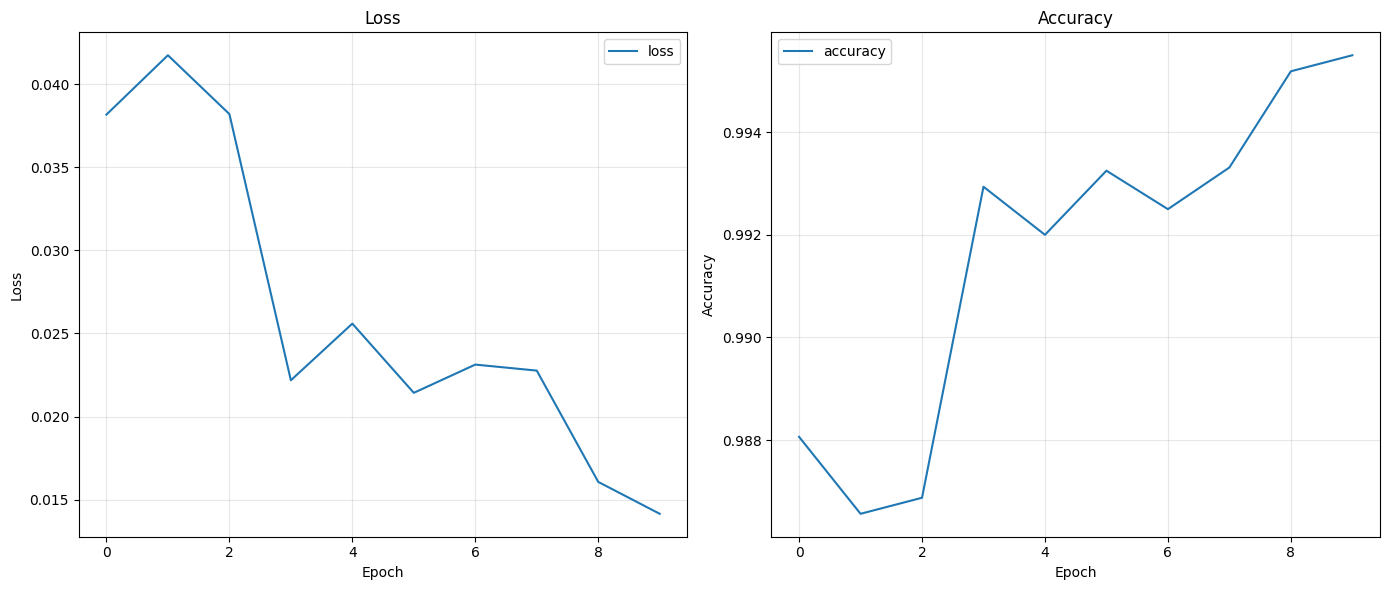

In [112]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(alpha=0.30)

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.title('Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(alpha=0.30)

plt.tight_layout()
plt.show()

# saving Model

In [41]:
model.save('Hand_Gesture_intelligence.h5')

In [113]:
# using tensorflow to load the saved model

from tensorflow.keras.models import load_model
loaded_model = load_model("Hand_Gesture_intelligence.h5")

# Prediction of some random clicked hand gesture pictures

In [114]:
def predict_label(image_path):
    image = str(image_path)
    # Loading of image
    image_new = load_img(image, target_size=(150,150), color_mode = 'grayscale')
    # converting to array and rescaling
    image_rescaled = img_to_array(image_new)/255.0
    # for adding batch dimensions
    image_ready = np.expand_dims(image_rescaled, axis=0)
    print(f"Shape of ready_image : {image_ready.shape}\n")

    # using model to predict
    pred = loaded_model.predict(image_ready)
    print(f"index of pred - {np.argmax(pred)}")

    label = classes[np.argmax(pred)]
    # printing the label of image
    print(f"Label of image {image_path} is : {label}\n\n")

    # Visualizing the infeed images
    plt.imshow(image_rescaled,cmap = 'grey')
    plt.title(f"{label}")
    plt.axis('off')

Shape of ready_image : (1, 150, 150, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
index of pred - 0
Label of image /content/img_i.jpg is : 06_index




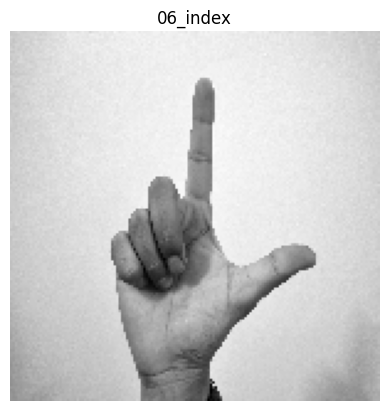

In [115]:
predict_label('/content/img_i.jpg')

Shape of ready_image : (1, 150, 150, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
index of pred - 0
Label of image /content/img_p.jpg is : 06_index




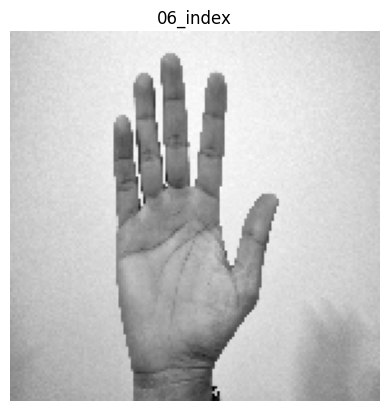

In [116]:
predict_label('/content/img_p.jpg')

Shape of ready_image : (1, 150, 150, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
index of pred - 6
Label of image /content/img_ff.jpg is : 03_fist




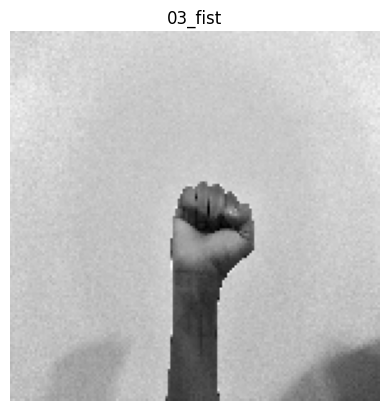

In [117]:
predict_label('/content/img_ff.jpg')

Shape of ready_image : (1, 150, 150, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
index of pred - 1
Label of image /content/img_th.jpg is : 08_palm_moved




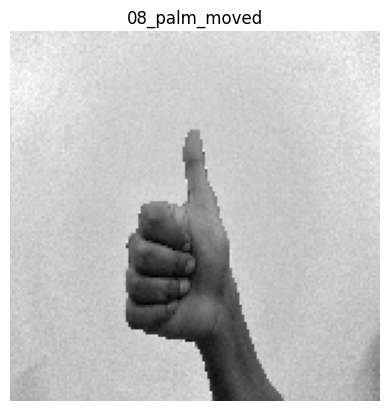

In [118]:
predict_label('/content/img_th.jpg')